<h1>Overview of Julia commands</h1>

<p>A quick overview of some <code>Julia</code> commands and constructs.</p>

In [1]:
note("""
Version 1.0 of Julia was released in August 2018. These notes reflect
version 0.6 of Julia. There are some surface level changes
(i.e. renaming of functions) that will cause errors if these are run
under 1.0. When the JuliaBox and Binder support 1.0, these should be
updated.
""")

<div class="alert alert-info" role="alert">
<div class="markdown"><p>Version 1.0 of Julia was released in August 2018. These notes reflect version 0.6 of Julia. There are some surface level changes (i.e. renaming of functions) that will cause errors if these are run under 1.0. When the JuliaBox and Binder support 1.0, these should be updated.</p>
</div> 
</div>


<h2>Getting Started</h2>

<p>You can download and install <code>Julia</code> on your computer – it is freely available. However, you can also use it through the web at <a href="https://juliabox.com">juliabox.com</a>. This is easy and gives the convenient <code>Jupyter</code> interface, we we will assume.</p>

<p>To use <code>juliabox.com</code>:</p>

<ul>
<li><p>have handy a gmail account</p>
</li>
<li><p>proceed to <code>juliabox.com</code> and log in with your gmail credentials</p>
</li>
<li><p>Under the "new" dropdown on the right side, open a new "Julia 0.6.0" notebook. (As of writing, this is the latest release)</p>
</li>
<li><p>We would need to install some packages: <code>Plots</code>, <code>PyPlot</code>, <code>SymPy</code>, <code>Roots</code>, <code>FowardDiff</code>, <code>QuadGK</code>.</p>
</li>
</ul>

<p>As well, you can view this file using Binder, which though slow at first, allows access without an account.</p>

<p>Now that that is done, you can type commands in a cell and hit the play button of "shift+enter" to execute them. Their output fills in below the cell.</p>

<h2>Commands</h2>

<p>Commands are typed at the REPL prompt or in a <code>IJulia</code> cell. New commands are separated by a new line or a semicolon.</p>

<h2>Numbers, variable types</h2>

<p>Unlike a calculator <code>Julia</code> has different "types" for different kinds of numbers. For example</p>

<ul>
<li><p>Integers: <code>2</code></p>
</li>
<li><p>Rational numbers: <code>1//2</code></p>
</li>
<li><p>Floating point numbers: <code>0.5</code></p>
</li>
<li><p>Complex numbers <code>2 &#43; 0im</code></p>
</li>
</ul>

<p>As much as possible, operations involving  certain types of numbers will produce output of a given type. For example, both of these divisions produce a floating point answer, even though  mathematically, they need not:</p>

In [1]:
2/1, 1/2

(2.0, 0.5)

<p>Some operations won't work with integer types, but will with floating point types, as the type of output can't be assured. Powers are the main example where <code>2^&#40;1/2&#41;</code> is not defined, but <code>2.0^&#40;1/2&#41;</code> is.</p>

<p>An expression like <code>&#40;-3.0&#41;^&#40;1/3&#41;</code> is not defined, as it can't be in general for the two types. However, <code>Julia</code> provides the special-case function <code>cbrt</code>.</p>

<p>Integer operations may silently overflow, producing odd answers:</p>

In [1]:
2^3^4    # is 2^(3^4) = 2^81 which is too big for 64 bit integers

0

<p>When different types of numbers are mixed, <code>Julia</code> will usually promote the values to a common type before the operation:</p>

In [1]:
(2 + 1//2) + 0.5

3.0

<p><code>Julia</code> will first add <code>2</code> and <code>1//2</code> converting the integer <code>2</code> to rational before doing so. Then <code>Julia</code> will add the result, <code>5//2</code>, to <code>0.5</code>, promoting <code>5//2</code> to the floating point number <code>2.5</code> before proceeding.</p>

<p>The standard mathematical operations are implemented by <code>&#43;</code>, <code>-</code>, <code>*</code>, <code>/</code>, <code>^</code>. Parentheses are used for grouping.</p>

<h2>Vectors</h2>

<p>Arithmetic sequences can be defined by either</p>

<ul>
<li><p><code>linspace&#40;a,b,n&#41;</code> which produces <code>n</code> values between <code>a</code> and <code>b</code>;</p>
</li>
</ul>

In [1]:
note("In v1.0 this is `range(a, stop=b, length=n)`")

<div class="alert alert-info" role="alert">
<div class="markdown"><p>In v1.0 this is <code>range&#40;a, stop&#61;b, length&#61;n&#41;</code></p>
</div> 
</div>


<ul>
<li><p><code>a:h:b</code> or <code>a:b</code> which produces values starting at <code>a</code> separated by <code>h</code> (<code>h</code> is <code>1</code> in the last form) until they reach <code>b</code>.</p>
</li>
<li><p>general vectors can be constructed with square brackets:</p>
</li>
</ul>

In [1]:
[1,1,2,3,5,8]

6-element Array{Int64,1}:
 1
 1
 2
 3
 5
 8

<h2>Variables</h2>

<p>Values can be assigned variable names, with <code>&#61;</code>. There are some variants</p>

In [1]:
x = 2
a_really_long_name = 3
a, b = 1, 2
a1 = a2 = 0

0

<p>The names can be short, as above, or more verbose. They can't start with a number, but can include numbers. It can also be a fancy unicode or even an emoji.</p>

<p>Names may be repurposed, even with values of different types (a dynamic language), save for function names, which have some special rules.</p>

<h2>Functions</h2>

<p>Functions in <code>Julia</code> are just regular objects. There are many built-in functions and it is easy to define new functions.</p>

<p>We call a function by passing arguments to it, grouped by parentheses:</p>

In [1]:
sin(pi)

1.2246467991473532e-16

<p>Functions can have one or more arguments, this <code>log</code> function has two with the first indicating the base:</p>

In [1]:
log(5, 100)   # log base 5 of 100

2.8613531161467867

<p>Many functions can share the same generic name. For example, for base $e$ logarithms, the <code>log</code> function is used directly:</p>

In [1]:
log(10)     # same as log(e, 10)

2.302585092994046

<p>Julia uses the number of arguments and types of the arguments to disambiguate which method to call. </p>

<p>Without parentheses, the name refers to generic name and the output lists the number of available implementations.</p>

In [1]:
log

log (generic function with 19 methods)

<h3>Built-in functions</h3>

<p><code>Julia</code> has numerous built-in <a href="http://julia.readthedocs.org/en/latest/manual/mathematical-operations/#powers-logs-and-roots">mathematical</a> functions.</p>

<h4>Powers logs and roots</h4>

<p>Besides <code>^</code>, there are <code>sqrt</code> and <code>cbrt</code> for powers. In addition basic function for exponential and  logarithmic functions:</p>

<pre>sqrt(x), cbrt(x)
exp(x)
log(x) # base e
log10(x), log2(x), log(b, x)
</pre>

<h4>Trigonometric functions</h4>

<p>The $6$ standard trig functions are implemented; their implementation for degree arguments; their inverse functions; and their hyperbolic analogs.</p>

<pre>sin, cos, tan, csc, sec, cot
sind, cosd, tand, cscd, secd, cotd
asin, acos, atan, acsc, asec, acot
sinh, cosh, tanh, csch, sech, coth
asinh, acosh, atanh, acsch, asech, acoth
</pre>

<h4>Useful functions</h4>

<p>Other useful and familiar functions are defined:</p>

<ul>
<li><p><code>abs&#40;x&#41;</code> absolute value</p>
</li>
<li><p><code>sign&#40;x&#41;</code> is $\lvert x \rvert/x$ except at $x=0$, where it is $0$.</p>
</li>
<li><p><code>floor&#40;x&#41;</code>, <code>ceil&#40;x&#41;</code> greatest integer less or least integer greater</p>
</li>
<li><p><code>max&#40;a,b&#41;</code> and <code>min&#40;a,b&#41;</code> larger (or smaller) of <code>a</code> or <code>b</code></p>
</li>
<li><p><code>maximum&#40;xs&#41;</code> and <code>minimum&#40;xs&#41;</code> largest or smallest of the collection referred to by <code>xs</code></p>
</li>
</ul>

<h3>User-defined functions</h3>

<p>Simple mathematical functions can be defined using standard mathematical notation:</p>

In [1]:
f(x) = -16x^2 + 100x + 2

f (generic function with 1 method)

<p>The argument <code>x</code> is passed into the body of function.</p>

<p>User defined functions can have 1 or more arguments:</p>

In [1]:
area(w, h) = w*h

area (generic function with 1 method)

<p>Julia makes different <em>methods</em> for <em>generic</em> function names, so functions whose argument specification are different are different functions, even if the name is the same. This is <em>polymorphism</em> and means users need only remember a much smaller set of function names.</p>

<p>Longer functions can be defined using the <code>function</code> keyword, the last command executed is returned:</p>

In [1]:
function f(x)
  y = x^2
  z = y - 3
  z
end

f (generic function with 1 method)

<p>Functions without names, <em>anonymous functions</em> are made with the <code>-&gt;</code> operator as in:</p>

In [1]:
x -> cos(x)^2 - cos(2x)

(::#1) (generic function with 1 method)

<p>These are useful when passing a function to another function.</p>

<h2>Conditional statements</h2>

<p><code>Julia</code> provides the traditional <code>if-else-end</code> statements, but more conveniently has a <code>ternary</code> operator for the simplest case:</p>

In [1]:
our_abs(x) = (x < 0) ? -x : x

our_abs (generic function with 1 method)

<p>Trying it:</p>

In [1]:
our_abs(-5)

5

<p>The traditional form would look like:</p>

In [1]:
function our_abs2(x)
    if x < 0
        -x
    else
        x
    end
end

our_abs2 (generic function with 1 method)

<p>And:</p>

In [1]:
our_abs2(5), our_abs2(-5)

(5, 5)

<h2>Looping</h2>

<p>Iterating over a collection can be done with the traditional <code>for</code> loop. However, there are list comprehensions to mimic the definition of a set:</p>

In [1]:
[x^2 for x in 1:10]

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

<p>And <code>map</code> to apply a function over a collection:</p>

In [1]:
map(sin, 1:4)

4-element Array{Float64,1}:
  0.841471
  0.909297
  0.14112 
 -0.756802

<p>More conveniently, the "dot" notation can be used to <em>broadcast</em> a function over its (possibly) vectorized arguments:</p>

In [1]:
log.([2,3,10], [10, 3, 2])  # log(2,10), log(3,3), log(10, 2)...

3-element Array{Float64,1}:
 3.32193
 1.0    
 0.30103

<h3>Fibonacci numbers</h3>

<p>Here are some examples.</p>

<p>What is some code to create the first 15 Fibonacci numbers?</p>

In [1]:
fibs = zeros(Int, 15) # space for 15 values
fibs[1:2] = [1,1] # first two
for i in 3:15
fibs[i] = fibs[i-1] + fibs[i-2]
end
fibs  

15-element Array{Int64,1}:
   1
   1
   2
   3
   5
   8
  13
  21
  34
  55
  89
 144
 233
 377
 610

<p>What is some code to create <em>all</em> the Fibonacci numbers less than 100?</p>

In [1]:
fibs = zeros(Int, 15) # space for 15 values
fibs[1:2] = [1,1] # first two
i = 3
while true                            # loop until we break
  next_one = fibs[i-1] + fibs[i-2]    # next value
  next_one >= 100 && break            # break if 100 or more
  fibs[i] = next_one                  # o/w we assign it
  i += 1                              # must manually increment in while 
end
fibs  

15-element Array{Int64,1}:
  1
  1
  2
  3
  5
  8
 13
 21
 34
 55
 89
  0
  0
  0
  0

<p>What is some code to make change? That is given an amount find the most efficient usage of quarters, dimes, nickels and pennies to equal the amount:</p>

In [1]:
function change(x)

  excess = Int(100 * x)
  Q,D,N,P = 25, 10, 5, 1

  qs, excess = divrem(excess, Q)
  ds, excess = divrem(excess, D)
  ns, excess = divrem(excess, N)
  ps = excess
  (qs, ds, ns, ps)
end

change(1.34)

(5, 0, 1, 4)

<p>What are <em>all</em> ways to make change?</p>

In [1]:
function all_change(x)
  x = Int(100 * x)
  Q,D,N,P = 25, 10, 5, 1
  out = Anyp[
  for q in 0:Q:x
    for d in 0:D:(x - q)
      for n in 0:N:(x - q - d)
         p = x - q - d - n
         push!(out, (q÷Q,d÷D,n÷N,p))
       end
     end
  end
  out
end

all_changes(0.12)

ErrorException("syntax: incomplete: premature end of input")


<h2>Plotting</h2>

<p>Plotting is <em>not</em> built-in to <code>Julia</code>, rather added through add-on packages. We use, <code>Julia</code>'s <code>Plots</code> package, an interface to several different backends. For this package, there are three basic calling styles:</p>

<p>Plotting a function by passing the function object by name. </p>

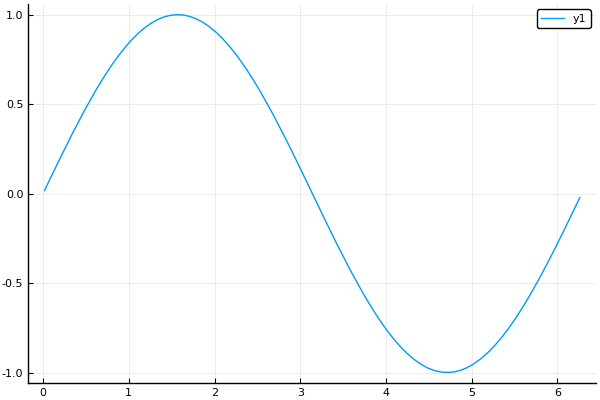

In [1]:
using Plots      # needed just once per session
pyplot()         # select a back end plotting package
plot(sin, 0, 2pi)

<p>Plotting an <em>anonymous</em> function</p>

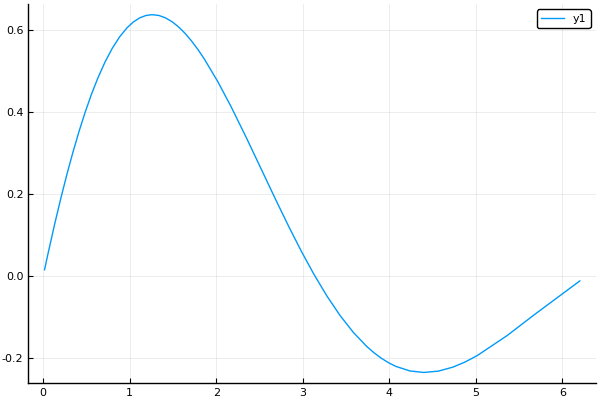

In [1]:
plot( x -> exp(-x/pi) * sin(x), 0, 2pi)

<p>Plotting more than one function over $[a,b]$ using <code>plot&#33;</code>:</p>

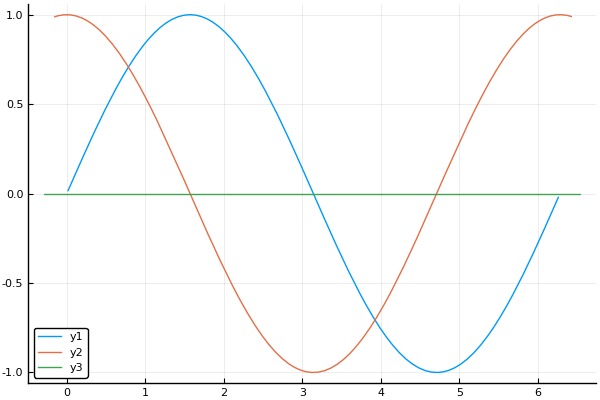

In [1]:
plot(sin, 0, 2pi)
plot!(cos)
plot!(zero)

<p>The <code>scatter</code> and <code>scatter&#33;</code> functions will plot points individually.</p>

<h2>Matrices</h2>

<p>Matrices are created by horizontally or vertically concatenating values:</p>

In [1]:
vcat(1,2,3)  # a vector Array{Int64,1}

3-element Array{Int64,1}:
 1
 2
 3

In [1]:
hcat(1,2,3) # a 1x3 matrix Array{Int64, 2}

1×3 Array{Int64,2}:
 1  2  3

<p>Combining these can be useful:</p>

In [1]:
hcat(vcat(1,2,3), vcat(4,5,6))

3×2 Array{Int64,2}:
 1  4
 2  5
 3  6

<p>The above is a bit cumbersome. The <code>&#91;&#93;</code> function does both:</p>

<ul>
<li><p><code>vcat</code> is done when values are separated by commas or semicolons</p>
</li>
<li><p><code>hcat</code> done when values are separated by spaces (whitespace is important!)</p>
</li>
</ul>

<p>(Not all permutations are possible)</p>

In [1]:
[1 2 3; 4 5 6]  # vertically concatenate two horizontal matrices

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [1]:
v = [1, 2, 3]
w = [4, 5, 6]   # vertical vectors
[v w]           # horizontally concatenate

3×2 Array{Int64,2}:
 1  4
 2  5
 3  6

<p>Blocks can be manipulated</p>

In [1]:
B = [1 1; 1 1]; v= [2,2]; C=[3 3 3]
[B v; C]

3×3 Array{Int64,2}:
 1  1  2
 1  1  2
 3  3  3

<p>Matrices can also be formed by comprehensions with two variables:</p>

In [1]:
[1//(i+j+1) for i in 1:5, j in 1:5]

5×5 Array{Rational{Int64},2}:
 1//3  1//4  1//5  1//6   1//7 
 1//4  1//5  1//6  1//7   1//8 
 1//5  1//6  1//7  1//8   1//9 
 1//6  1//7  1//8  1//9   1//10
 1//7  1//8  1//9  1//10  1//11

<h2>Floating point</h2>

<p>There are various functions to work with floating point values.</p>

<ul>
<li><p><code>nextfloat</code> and <code>prevfloat</code> to give the floating point value to the right or left</p>
</li>
<li><p><code>typemax</code> and <code>typemin</code> to give the largest and smallest value representable by a type</p>
</li>
<li><p><code>bits</code> to show the bits used in storage</p>
</li>
</ul>

In [1]:
note("In v1.0 this is `bitstring`")

<div class="alert alert-info" role="alert">
<div class="markdown"><p>In v1.0 this is <code>bitstring</code></p>
</div> 
</div>


<ul>
<li><p><code>Float16</code>, <code>Float32</code>, <code>Float64</code>, <code>BigFloat</code> for floats of different storage size.</p>
</li>
</ul>

<p>For example, this is the largest non-infinite floating point value for 16-bit floating point values:</p>

In [1]:
prevfloat(typemax(Float16))

Float16(6.55e4)

<p>The bits used for floating point numbers are detailed <a href="http://en.wikipedia.org/wiki/Floating_point#Internal_representation">here</a></p>

<p>For 64-bit floating point values the first bit is the sign bit, bits <code>2:12</code> code the exponent and bits <code>13:64</code> code the significand.</p>

<p>For 16-bit floating point values again the first bit is the sign bit, bits <code>2:6</code> code the exponent and bits <code>7:16</code> code the significand.</p>

<p>Here we can see the special codings of 0, <code>Inf</code> and <code>NaN</code>:</p>

In [1]:
xs =  [0, -Inf, Inf, NaN]
[rpad(i, 10) * "$(bits(x)[1]) $(bits(x)[2:6])  $(bits(x)[7:16])" for (i,x) in zip(xs, [convert(Float16, x) for  x in xs])]

4-element Array{String,1}:
 "0.0       0 00000  0000000000"
 "-Inf      1 11111  0000000000"
 "Inf       0 11111  0000000000"
 "NaN       0 11111  1000000000"

<p>This shows powers of <code>2</code> and how they are coded (15 = "01111")</p>

In [1]:
xs = [2.0^i for i in -2:2]
[rpad(i, 10) * "$(bits(x)[1]) $(bits(x)[2:6])  $(bits(x)[7:16])" for (i,x) in zip(xs, [convert(Float16, x) for  x in xs])]

5-element Array{String,1}:
 "0.25      0 01101  0000000000"
 "0.5       0 01110  0000000000"
 "1.0       0 01111  0000000000"
 "2.0       0 10000  0000000000"
 "4.0       0 10001  0000000000"

<p>This shows the significand changing</p>

In [1]:
xs = 1:8
[rpad(i, 10) * "$(bits(x)[1]) $(bits(x)[2:6])  $(bits(x)[7:16])" for (i,x) in zip(xs, [convert(Float16, x) for  x in xs])]

8-element Array{String,1}:
 "1         0 01111  0000000000"
 "2         0 10000  0000000000"
 "3         0 10000  1000000000"
 "4         0 10001  0000000000"
 "5         0 10001  0100000000"
 "6         0 10001  1000000000"
 "7         0 10001  1100000000"
 "8         0 10010  0000000000"

<p>We see how the binary representation is comprised:</p>

In [1]:
xs = [1 + 1//2 + 0//4 + 1//8 + 0//16 + 1//32]
[rpad(i, 10) * "$(bits(x)[1]) $(bits(x)[2:6])  $(bits(x)[7:16])" for (i,x) in zip(xs, [convert(Float16, x) for  x in xs])]

1-element Array{String,1}:
 "53//32    0 01111  1010100000"

<p>Multiplying by 2 just adds 1 to the exponent</p>

In [1]:
xs = [3, 6, 12, 24]
[rpad(i, 10) * "$(bits(x)[1]) $(bits(x)[2:6])  $(bits(x)[7:16])" for (i,x) in zip(xs, [convert(Float16, x) for  x in xs])]

4-element Array{String,1}:
 "3         0 10000  1000000000"
 "6         0 10001  1000000000"
 "12        0 10010  1000000000"
 "24        0 10011  1000000000"

<p>Dividing by 2 subtracts 1 from the exponent</p>

In [1]:
xs = [3, 3//2, 3//4, 3//8]
[rpad(i, 10) * "$(bits(x)[1]) $(bits(x)[2:6])  $(bits(x)[7:16])" for (i,x) in zip(xs, [convert(Float16, x) for  x in xs])]

4-element Array{String,1}:
 "3//1      0 10000  1000000000"
 "3//2      0 01111  1000000000"
 "3//4      0 01110  1000000000"
 "3//8      0 01101  1000000000"

<p>For even faster math, some programs will work by manipulating bits.</p>

<h2>Psuedocode</h2>

<p>Translating pseudo code into an algorithm with <code>Julia</code> is usually pretty straightforward. Consider this code for the bisection method:</p>


$$
\begin{align}
&\textbf{input } a, b, M, \delta, \epsilon\\
&u \leftarrow f(a)\\
&v \leftarrow f(b)\\
&e \leftarrow b - a\\
&\textbf{if } sign(u) = sign(v) \textbf{ then stop}\\
&\textbf{for } k=1 \textbf{ to } M \textbf{ do}\\
&\quad e \leftarrow e/2     \\
&\quad c \leftarrow a + e     \\
&\quad w \leftarrow f(c)     \\
&\quad \textbf{if } \lvert e\rvert < \delta \textbf{ or } \lvert w \rvert < \epsilon \textbf{ then stop}\\
&\quad \textbf{if } sign(w) \neq sign(u) \textbf{ then}     \\
&\quad \quad b \leftarrow c     \\
&\quad \quad v \leftarrow w     \\
&\quad \textbf{else}     \\
&\quad \quad a \leftarrow c     \\
&\quad \quad u \leftarrow w     \\
&\quad \textbf{end if}     \\
&\textbf{end do}     \\
\end{align}
$$


<p>The bold text are commands. Here is a <code>julia</code> translation:</p>

In [1]:
function bisection(f, a, b; M=64, delta=1e-12, epsilon=1e-12)
u,v = f(a),f(b)
e = b-a
c = Inf

if sign(u) == sign(v) error("a,b not a bracket") end
for k in 1:M
  e = e/2
  c = a + e
  w = f(c)
  if (abs(e) < delta) | (abs(w) < epsilon)
    break
  end

  if sign(w) != sign(u)
    b,v = c, w
  else
    a,u = c, w
  end
end

return c
end

bisection (generic function with 1 method)

<p>Does it work? Let's find $\pi$:</p>

In [1]:
bisection(sin, 3, 4)

3.1415926535901235

<p><code>Julia</code> uses a fairly similar set of commands with a few differences:</p>

<ul>
<li><p><strong>input</strong> is replaced by the <code>function</code> keyword to begin a multi-line function</p>
</li>
<li><p>the pseudocode $\leftarrow$ is just <code>&#61;</code>, the assignment operator.</p>
</li>
<li><p>the equality test $=$ is replaced by <code>&#61;&#61;</code> (as <code>&#61;</code> is assignment, not a test for equality)</p>
</li>
<li><p><strong>if-then-stop</strong> is replaced with an <code>if-then-end</code> and <strong>stop</strong> is handled by <code>error</code> in one case and <code>break</code> in another, as that is what the logic dictates.</p>
</li>
<li><p><strong>or</strong> becomes <code>|</code> (and <strong>and</strong> becomes <code>&amp;</code>). (There are also shortcut versions <code>&amp;&amp;</code> and <code>||</code>. These are often used used for control flow in <code>julia</code>, as with <code>sign&#40;u&#41; &#61;&#61; sign&#40;v&#41; &amp;&amp; error&#40;&quot;...&quot;&#41;</code>.)</p>
</li>
<li><p><strong>for-to-do ... end do</strong> becomes a <code>for</code> loop with the syntax <code>for var in collection ... end</code></p>
</li>
<li><p><strong>if-else-end if</strong> becomes <code>if-else-end</code>.</p>
</li>
</ul>

<p>A more subtle point is the value of <code>c</code> in the pseudo code is assigned within a <code>for</code> loop. Our "mental" compiler has no trouble recognizing this assignment in producing the answer. However, in real <code>Julia</code> code this assignment will not be visible outside the block, as a block-local variable is created unless there already is a global binding assigned. In the <code>julia</code> code this is done by initializing <code>c</code> to <code>Inf</code>. As well, we explicitly return <code>c</code> from our function as that is the approximate answer.</p>